# testing libraries

In [ ]:
import librosa, librosa.display
import matplotlib.pyplot as plt
from IPython.display import Audio
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file = '/content/drive/MyDrive/IEMOCAP-dataset/FinalDataset/Ses03M_impro06_M014.wav'

In [ ]:
signal, sr = librosa.load(file, sr=16000)

In [ ]:
Audio(signal, rate=sr)

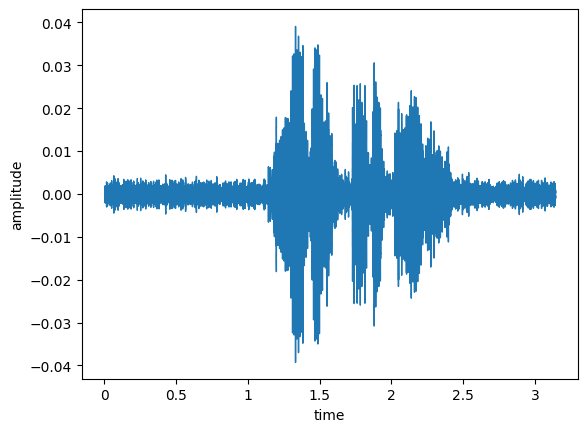

In [ ]:
librosa.display.waveshow(signal, sr=sr)
plt.xlabel('time')
plt.ylabel('amplitude')
plt.show()

In [ ]:
# fast fourier transfor
fft = np.fft.fft(signal)

magnitude = np.abs(fft)
# get same size bins in the required frequency range to map the magnitudes with it
freq = np.linspace(0, sr, len(magnitude))

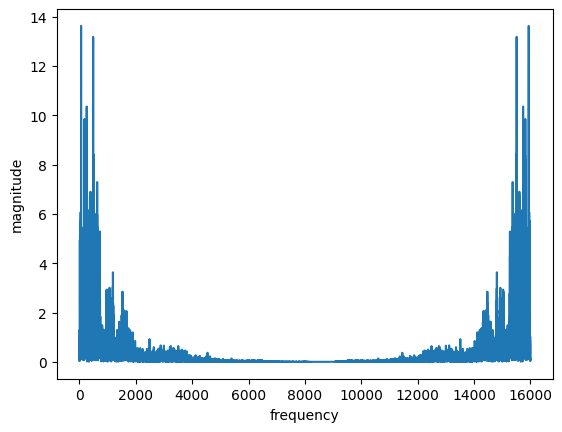

In [ ]:
plt.plot(freq, magnitude)
plt.xlabel('frequency')
plt.ylabel('magnitude')
plt.show()

graph is symmetric <br>
property of the FFT <br>
forcusing on first half only

In [ ]:
left_freq = freq[:int(len(freq)/2)]
left_magnitude = magnitude[:int(len(magnitude)/2)]

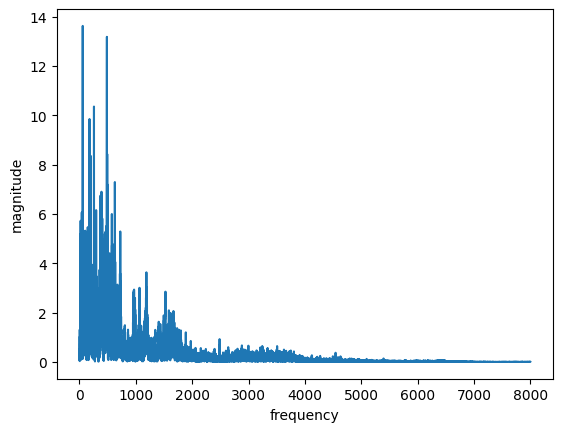

In [ ]:
plt.plot(left_freq, left_magnitude)
plt.xlabel('frequency')
plt.ylabel('magnitude')
plt.show()

need idea about time too <br>
perform STFT

In [ ]:
# no of samples per fft
n_fft = 512
# shifting size of one fourier transfor to the right
hop_length = 1024
stft = librosa.core.stft(signal, n_fft=n_fft, hop_length=hop_length)

In [ ]:
# get magnitude
spectro = np.abs(stft)

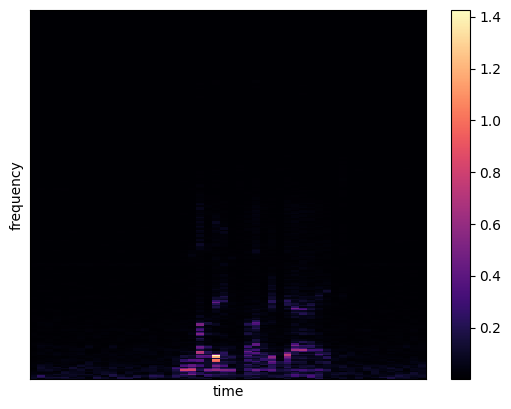

In [ ]:
# plot
librosa.display.specshow(spectro, sr=sr, hop_length=hop_length)
plt.xlabel('time')
plt.ylabel('frequency')
plt.colorbar()
plt.show()

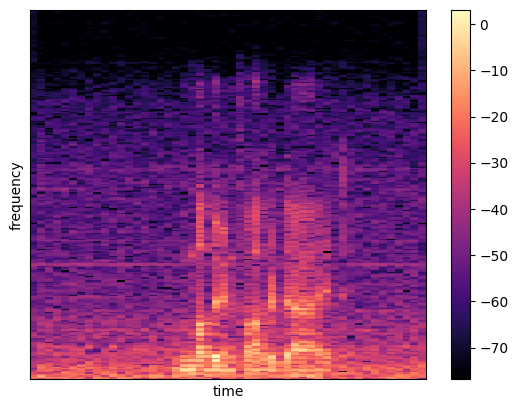

In [ ]:
# get decibel
log_spectro = librosa.amplitude_to_db(spectro)
librosa.display.specshow(log_spectro, sr=sr, hop_length=hop_length)
plt.xlabel('time')
plt.ylabel('frequency')
plt.colorbar()
plt.show()

In [ ]:
log_spectro

array([[-20.15193  , -28.963757 , -20.427036 , ..., -20.11738  ,
        -23.835884 , -46.989002 ],
       [-20.394156 , -14.591518 , -18.468235 , ..., -18.440191 ,
        -25.5534   , -22.58607  ],
       [-22.283794 , -12.5172825, -23.13472  , ..., -19.363688 ,
        -21.952805 , -20.425743 ],
       ...,
       [-69.91685  , -76.911964 , -76.911964 , ..., -76.911964 ,
        -76.911964 , -66.51531  ],
       [-68.39789  , -76.47783  , -76.911964 , ..., -76.911964 ,
        -76.911964 , -66.734055 ],
       [-68.298996 , -74.741066 , -76.911964 , ..., -76.911964 ,
        -76.911964 , -67.38583  ]], dtype=float32)

In [ ]:
log_spectro.shape

(257, 50)

In [ ]:
log_spectro_flat = log_spectro.flatten()
log_spectro_flat

array([-20.15193 , -28.963757, -20.427036, ..., -76.911964, -76.911964,
       -67.38583 ], dtype=float32)

In [ ]:
log_spectro_flat.shape

(12850,)

In [ ]:
log_spectro_flat = np.append(log_spectro_flat, 2)
d = pd.DataFrame()
arr_df = pd.DataFrame(log_spectro_flat.reshape(1, -1))
pd.concat([d, arr_df], ignore_index=True, sort=False)

,0,1,2,3,4,5,6,7,8,9,...,12841,12842,12843,12844,12845,12846,12847,12848,12849,12850
0,-20.15193,-28.963757,-20.427036,-22.120522,-19.052052,-20.411627,-21.178549,-30.450729,-15.641503,-19.439577,...,-76.911964,-76.911964,-76.911964,-76.911964,-75.282204,-76.911964,-76.911964,-76.911964,-67.385834,2.0


In [ ]:
# generate MFCC
mfcc = librosa.feature.mfcc(y=signal, sr=sr, n_mfcc=2048, n_fft=n_fft, hop_length=hop_length)

In [ ]:
mfcc

array([[-7.3171350e+02, -6.8582684e+02, -6.9371259e+02, ...,
        -6.9617010e+02, -6.8428705e+02, -6.9155920e+02],
       [ 1.1310304e+02,  1.3017728e+02,  1.3767340e+02, ...,
         1.2691414e+02,  1.3709500e+02,  1.2879980e+02],
       [-5.7422915e+00,  4.9315195e+00, -7.0993938e+00, ...,
        -6.7381883e+00, -1.2522715e+01,  1.8495457e+01],
       ...,
       [-9.4651890e-01, -3.1151276e+00,  2.0136185e+00, ...,
        -1.0270367e+00, -3.8171616e+00, -1.1072769e+00],
       [-1.3108630e+00, -1.7154646e+00,  2.5353968e+00, ...,
        -1.7686701e-01,  1.0536909e+00, -9.2418766e-01],
       [-8.9932251e-01, -2.7921906e+00,  6.3650513e-01, ...,
        -5.4021072e-01, -3.0314407e+00, -8.6369324e-01]], dtype=float32)

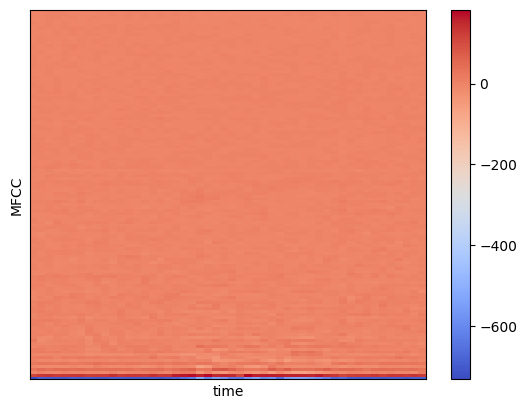

In [ ]:
librosa.display.specshow(mfcc, sr=sr, hop_length=hop_length)
plt.xlabel('time')
plt.ylabel('MFCC')
plt.colorbar()
plt.show()

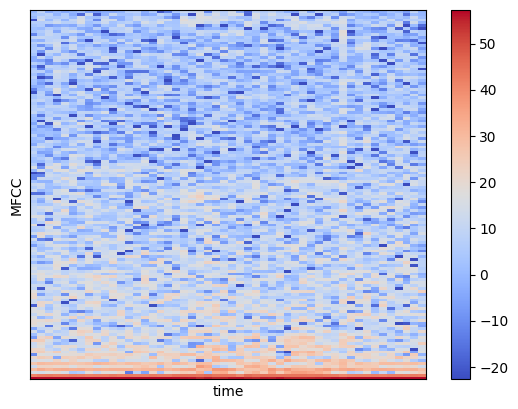

In [ ]:
log_mfcc = librosa.amplitude_to_db(mfcc)

librosa.display.specshow(log_mfcc, sr=sr, hop_length=hop_length)
plt.xlabel('time')
plt.ylabel('MFCC')
plt.colorbar()
plt.show()

In [ ]:
log_spectro.shape

(257, 50)

# Training testing

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/IEMOCAP-dataset/FinalDataset/labels.csv', header=None)


In [ ]:
df.head(10)

,0,1
0,Ses01F_impro01_F000,neu
1,Ses01F_impro01_F001,neu
2,Ses01F_impro01_F002,neu
3,Ses01F_impro01_F003,xxx
4,Ses01F_impro01_F004,xxx
5,Ses01F_impro01_F005,neu
6,Ses01F_impro01_F006,fru
7,Ses01F_impro01_F007,fru
8,Ses01F_impro01_F008,fru
9,Ses01F_impro01_F009,fru


In [ ]:
df[1].unique()

array(['neu', 'xxx', 'fru', 'ang', 'sad', 'hap', 'exc', 'sur', 'fea',
       'dis', 'oth'], dtype=object)

In [ ]:
df.shape

(4784, 2)

In [ ]:
df_filtered = df.loc[df[1] != 'xxx']

In [ ]:
df_filtered.shape

(3984, 2)

In [ ]:
for each in df[1].unique():
  print(each, df.loc[df[1]  == each].shape)

neu (1099, 2)
xxx (800, 2)
fru (971, 2)
ang (289, 2)
sad (608, 2)
hap (284, 2)
exc (663, 2)
sur (60, 2)
fea (8, 2)
dis (1, 2)
oth (1, 2)


In [ ]:
# dataset unbalaced
# balancing by duplicating
# balance anger
df_ang = df.loc[df[1] == 'ang']
df_con = pd.concat([df, df_ang], ignore_index=True, sort=False)
df_con = pd.concat([df_con, df_ang], ignore_index=True, sort=False)


In [ ]:
# balance sad
df_sad = df.loc[df[1] == 'sad']
for i in range(1):
  df_con = pd.concat([df_con, df_sad], ignore_index=True, sort=False)

In [ ]:
# balance hap
df_hap = df.loc[df[1] == 'hap']
for i in range(2):
  df_con = pd.concat([df_con, df_hap], ignore_index=True, sort=False)

In [ ]:
# balance exc
df_exc = df.loc[df[1] == 'exc']
for i in range(1):
  df_con = pd.concat([df_con, df_exc], ignore_index=True, sort=False)

In [ ]:
# balance sur
df_sur = df.loc[df[1] == 'sur']
for i in range(15):
  df_con = pd.concat([df_con, df_sur], ignore_index=True, sort=False)

In [ ]:
# balance fea
df_fea = df.loc[df[1] == 'fea']
for i in range(125):
  df_con = pd.concat([df_con, df_fea], ignore_index=True, sort=False)

In [ ]:
# balance dis
df_dis = df.loc[df[1] == 'dis']
for i in range(1100):
  df_con = pd.concat([df_con, df_dis], ignore_index=True, sort=False)

In [ ]:
# balance oth
df_oth = df.loc[df[1] == 'oth']
for i in range(1100):
  df_con = pd.concat([df_con, df_oth], ignore_index=True, sort=False)

In [ ]:
# check content
for each in df_con[1].unique():
  print(each, df_con.loc[df_con[1]  == each].shape)

neu (1099, 2)
xxx (800, 2)
fru (971, 2)
ang (867, 2)
sad (1216, 2)
hap (852, 2)
exc (1326, 2)
sur (960, 2)
fea (1008, 2)
dis (1101, 2)
oth (1101, 2)


In [ ]:
df_con.shape

(11301, 2)

In [ ]:
df_filtered = df_con.loc[df_con[1] != 'xxx']
df_filtered.shape

(10501, 2)

In [ ]:
emotions = tuple(df_filtered[1].unique())

In [ ]:
dataset = pd.DataFrame()

for index, row in df_filtered.iterrows():

  audio_file = '/content/drive/MyDrive/IEMOCAP-dataset/FinalDataset/' + row[0] + '.wav'
  emotion = emotions.index(row[1])

  signal, sr = librosa.load(audio_file, sr=16000)
  spectro = librosa.amplitude_to_db(np.abs(librosa.core.stft(signal, n_fft=512, hop_length=1024)))
  features = np.append(spectro.flatten(), emotion)
  dataset = pd.concat([dataset, pd.DataFrame(features.reshape(1, -1))], ignore_index=True, sort=False)

dataset.head()

In [ ]:
dataset = dataset.sample(frac=1).reset_index(drop=True)

In [ ]:
dataset.head(100)

In [ ]:
dataset.to_csv('/content/drive/MyDrive/IEMOCAP-dataset/pre-processed.csv')